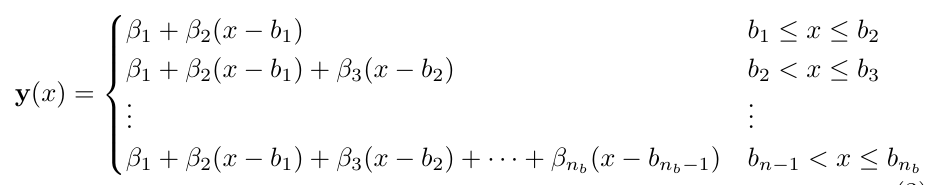

![Pasted image 20240906190431.png](<attachment:Pasted image 20240906190431.png>)
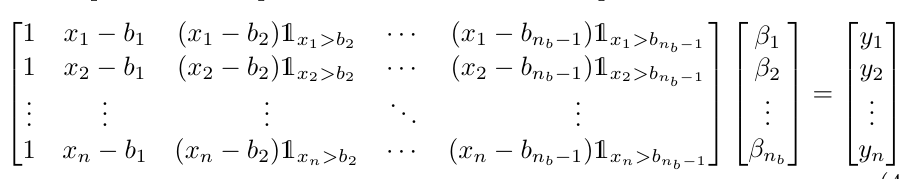

$$\beta = (A^T A)^{-1}A^Ty$$
The regression matrix A has a number of interesting properties. Since the data was ordered initially, A will somewhat resemble a lower triangular matrix2
with the upper right area of the matrix being filled with zeros. Also, A can
be assembled quickly from the ordered x data. This is particularly important
when using optimization in cases where the breakpoint locations are unknown,
because the optimization process will assemble the matrix A many times

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.arange(0, 1, 0.01)
y = np.abs(2 * np.sin(8 * x)) * np.cos(16 * x)

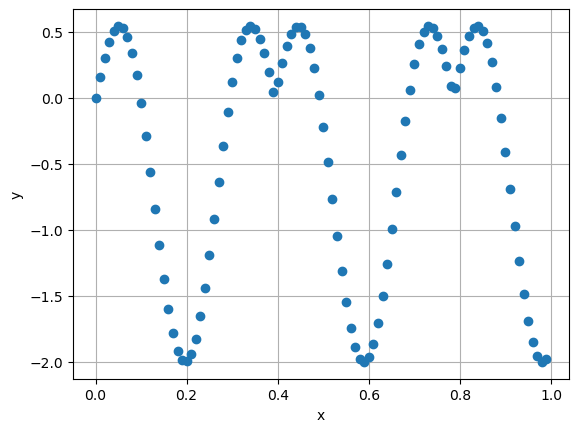

In [3]:
plt.figure()
plt.plot(x, y, "o")
# plt.plot(x_hat, y_hat, '-')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [4]:
b = [0.2, 0.4, 0.6, 0.8]

Получается 4 сегмента (0, 1 также точки)

minimize SSR(b), b = [b2, · · · , bnb−1]T
subject to x1 ≤ bk ≤ xn, k = 1, 2, · · · , nb.

In [5]:
b += [1.0]
b = [0.0] + b
b

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [6]:
assert len(b) >= 2

In [7]:
A = np.zeros((len(x), len(b)))
for i in range(0, len(x)):
    A[i, 0] = 1.0
    A[i, 1] = x[i] - 0
for i in range(0, len(x)):
    for j in range(2, len(b)):
        A[i, j] = (x[i] > b[j - 1]) * (x[i] - b[j - 1])
A

array([[ 1.  ,  0.  , -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.01, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.02, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.03, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.04, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.05, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.06, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.07, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.08, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.09, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.1 , -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.11, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.12, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.13, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.14, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.15, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.16, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.17, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.18, -0.  , -0.  , -0.  , -0.  ],
       [ 1.  ,  0.19, -0.  , -0

In [8]:
A.T @ A

array([[100.   ,  49.5  ,  31.6  ,  17.7  ,   7.8  ,   1.9  ],
       [ 49.5  ,  32.835,  23.068,  14.101,   6.734,   1.767],
       [ 31.6  ,  23.068,  16.748,  10.561,   5.174,   1.387],
       [ 17.7  ,  14.101,  10.561,   7.021,   3.614,   1.007],
       [  7.8  ,   6.734,   5.174,   3.614,   2.054,   0.627],
       [  1.9  ,   1.767,   1.387,   1.007,   0.627,   0.247]])

In [9]:
np.linalg.inv(A.T @ A)

array([[  0.15903578,  -1.00733182,   1.27610789,  -0.34059026,
          0.0913748 ,  -0.02628299],
       [ -1.00733182,   8.38644234, -12.63027498,   5.37774091,
         -1.44275994,   0.4149945 ],
       [  1.27610789, -12.63027498,  22.55480011, -14.58520072,
          5.93014112,  -1.7057418 ],
       [ -0.34059026,   5.37774091, -14.58520072,  18.24162522,
        -13.54282835,   6.05815176],
       [  0.0913748 ,  -1.44275994,   5.93014112, -13.54282835,
         18.36963586, -15.09916826],
       [ -0.02628299,   0.4149945 ,  -1.7057418 ,   6.05815176,
        -15.09916826,  24.49038847]])

In [10]:
np.linalg.inv(A.T @ A) @ A.T

array([[ 1.59035777e-01,  1.48962459e-01,  1.38889141e-01,
         1.28815823e-01,  1.18742504e-01,  1.08669186e-01,
         9.85958680e-02,  8.85225497e-02,  7.84492315e-02,
         6.83759133e-02,  5.83025950e-02,  4.82292768e-02,
         3.81559585e-02,  2.80826403e-02,  1.80093221e-02,
         7.93600382e-03, -2.13731442e-03, -1.22106327e-02,
        -2.22839509e-02, -3.23572691e-02, -4.24305874e-02,
        -3.97428267e-02, -3.70550660e-02, -3.43673054e-02,
        -3.16795447e-02, -2.89917840e-02, -2.63040234e-02,
        -2.36162627e-02, -2.09285020e-02, -1.82407413e-02,
        -1.55529807e-02, -1.28652200e-02, -1.01774593e-02,
        -7.48969865e-03, -4.80193797e-03, -2.11417730e-03,
         5.73583370e-04,  3.26134404e-03,  5.94910471e-03,
         8.63686539e-03,  1.13246261e-02,  1.06064842e-02,
         9.88834226e-03,  9.17020035e-03,  8.45205845e-03,
         7.73391655e-03,  7.01577465e-03,  6.29763275e-03,
         5.57949084e-03,  4.86134894e-03,  4.14320704e-0

In [11]:
beta = (np.linalg.inv(A.T @ A) @ A.T) @ y
beta

array([  0.86914393, -13.21875577,  26.80219419, -27.35671513,
        28.11062464, -30.98716053])

In [12]:
def fun(x, b, beta):
    assert x >= 0.0 and x <= 1.0

    def find_interval(arr, x):
        low, high = 0, len(arr) - 1

        # Perform binary search
        while low <= high:
            mid = (low + high) // 2

            if arr[mid] <= x <= arr[mid + 1]:
                return mid  # Found the interval where b_i < x < b_i+1
            elif x < arr[mid]:
                high = mid - 1
            else:
                low = mid + 1

        return None  # This should not happen if the input list is valid and sorted

    b_i = find_interval(b, x)
    y = beta[0]
    for i in range(1, b_i + 2):
        y += beta[i] * (x - b[i - 1])
    return y

In [13]:
b

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [14]:
beta

array([  0.86914393, -13.21875577,  26.80219419, -27.35671513,
        28.11062464, -30.98716053])

In [15]:
x_hat = np.arange(0, 1, 0.01)
vectorized_function = np.vectorize(fun)
y_hat = np.zeros(len(x_hat))
for i in range(len(x_hat)):
    y_hat[i] = fun(x_hat[i], b, beta)

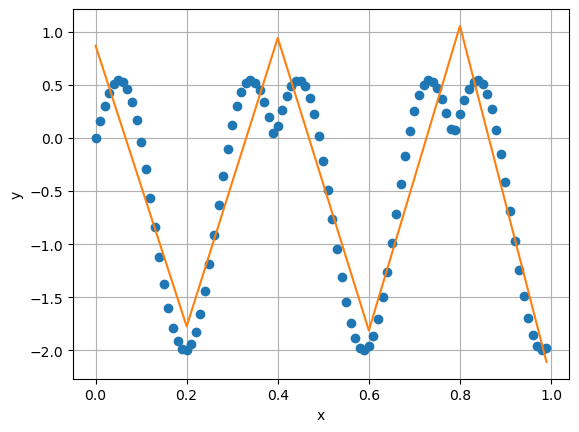

In [16]:
plt.figure()
plt.plot(x, y, "o")
plt.plot(x_hat, y_hat, "-")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

n/m в каждом куске

In [17]:
z = np.abs(y[0] - fun(x[0], b, beta))
for i in range(1, len(y)):
    z = max(z, np.abs(y[i] - fun(x[i], b, beta)))
z

0.8691439324029169

In [18]:
x = np.arange(0, 1, 0.01)
y = np.abs(2 * np.sin(8 * x)) * np.cos(16 * x)
fun_str = "np.abs(2*np.sin(8*x))*np.cos(16*x)"

In [19]:
import lab1

In [20]:
table = lab1.create_table(fun_str, x, y, len(x), [5, 6, 10, 20, 30])
table

,Function,Number of points,Number of pieces (M),Error
0,np.abs(2*np.sin(8*x))*np.cos(16*x),100,5,0.869144
1,np.abs(2*np.sin(8*x))*np.cos(16*x),100,6,1.139502
2,np.abs(2*np.sin(8*x))*np.cos(16*x),100,10,0.423891
3,np.abs(2*np.sin(8*x))*np.cos(16*x),100,20,0.188195
4,np.abs(2*np.sin(8*x))*np.cos(16*x),100,30,0.136651


In [21]:
table = lab1.create_table_improved(
    [
        [
            "np.abs(2*np.sin(8*x))*np.cos(16*x)",
            lambda x: np.abs(2 * np.sin(8 * x)) * np.cos(16 * x),
        ],
        [
            "10*np.exp(x)*np.ln(x)/np.lg(x+10)",
            lambda x: 10 * np.exp(x) * np.log(100 + x) / np.log10(x + 100),
        ],
    ],
    [0.01, 0.005, 0.001, 0.0002, 0.0005, 0.000125, 0.0002, 0.0001],
    [5, 6, 10, 20, 50, 100, 500, 1000, 5000, 7000, 10000, 20000, 50000],
)
table

,Function,Number of points,Number of pieces (M),Error
0,np.abs(2*np.sin(8*x))*np.cos(16*x),100,5,0.869144
1,np.abs(2*np.sin(8*x))*np.cos(16*x),100,6,1.139502
2,np.abs(2*np.sin(8*x))*np.cos(16*x),100,10,0.423891
3,np.abs(2*np.sin(8*x))*np.cos(16*x),100,20,0.188195
4,np.abs(2*np.sin(8*x))*np.cos(16*x),100,50,0.083040
...,...,...,...,...
113,10*np.exp(x)*np.ln(x)/np.lg(x+10),10000,50,0.002043
114,10*np.exp(x)*np.ln(x)/np.lg(x+10),10000,100,0.000514
115,10*np.exp(x)*np.ln(x)/np.lg(x+10),10000,500,0.019734
116,10*np.exp(x)*np.ln(x)/np.lg(x+10),10000,1000,0.903929


In [22]:
table.groupby(by="Function")["Error"].min()

Function
10*np.exp(x)*np.ln(x)/np.lg(x+10)     0.000452
np.abs(2*np.sin(8*x))*np.cos(16*x)    0.004506
Name: Error, dtype: float64